# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Датасет

In [20]:
df = pd.read_csv('F:/Рабочий стол/Spotify2023_Analysis/spotify-2023.csv', encoding='ISO-8859-1')

In [21]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

**Столбец released_month представлен в типе int64, когда там всего 12 уникальных значений. Можно использовать категориальные переменные

In [23]:
def int_to_month_name(month_integer):
    month_names = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                  'November', 'December']
    return month_names[month_integer]

In [24]:
df['released_month'] = df['released_month'].apply(int_to_month_name)

In [25]:
df['released_month'].unique()

array(['July', 'March', 'June', 'August', 'May', 'April', 'January',
       'December', 'February', 'October', 'November', 'September'],
      dtype=object)

**В данном проекте нет большой нужды в столбце released_day, можно его отбросить

In [26]:
df.drop(axis = 1, columns = 'released_day', inplace = True)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,July,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,March,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,June,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,August,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,May,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


# Пропущенные значения

In [17]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

**Столбец in_shazam_charts означает наличие и ранг песни в чартах шазама. Значение может быть нулевое, т.к. песни просто не было в шазаме
**Но у каждой песни обязательно должно быть значение key, оно не может быть пустым

In [27]:
df['in_shazam_charts'].fillna(0, inplace = True)

**Так как мы не можем определить точное значение ключа для подстановки, а случайное заполнение наверняка даст нам неверные результаты, заполним нулевые значения ключа знаком "-"

In [28]:
df['key'].fillna('-', inplace = True)

In [29]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

# Категориальный анализ

In [31]:
def categoric_data(dataframe, cat_th = 12, car_th = 20):
    cat_cols = [col for col in dataframe.columns if str(dataframe.dtypes[col]) in ['category', 'bool', 'object']]
    num_but_cat = [col for col in dataframe.columns if str(dataframe.dtypes[col]) in ['int64', 'float64'] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe.dtypes[col]) in ['category', 'object'] and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['int64', 'float64']]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observation: {dataframe.shape[0]}")
    print(f"Variebles: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [32]:
cat_cols, num_cols, cat_but_car, num_but_cat = categoric_data(df)

Observation: 953
Variebles: 23
cat_cols: 4
num_cols: 14
cat_but_car: 5
num_but_cat: 1


In [34]:
[df[col].value_counts() for col in cat_cols]

[January      134
 May          128
 March         86
 June          86
 November      80
 December      75
 October       73
 April         66
 July          62
 February      61
 September     56
 August        46
 Name: released_month, dtype: int64,
 C#    120
 G      96
 -      95
 G#     91
 F      89
 B      81
 D      81
 A      75
 F#     73
 E      62
 A#     57
 D#     33
 Name: key, dtype: int64,
 Major    550
 Minor    403
 Name: mode, dtype: int64,
 1    587
 2    254
 3     85
 4     15
 5      5
 6      3
 8      2
 7      2
 Name: artist_count, dtype: int64]

In [35]:
cat_but_car

['track_name',
 'artist(s)_name',
 'streams',
 'in_deezer_playlists',
 'in_shazam_charts']

**streams переменные должны быть числовыми, на данный момент типа object

In [36]:
df['streams']

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [37]:
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')
df['streams'].head()

0    141381703.0
1    133716286.0
2    140003974.0
3    800840817.0
4    303236322.0
Name: streams, dtype: float64

In [38]:
cat_but_car

['track_name',
 'artist(s)_name',
 'streams',
 'in_deezer_playlists',
 'in_shazam_charts']

**in deezer_playlists и in_shazam_charts аналогично должны быть числовыми, но я не буду их использовать, поэтому оставлю как есть

# Визуализация

Text(0.5, 1.0, 'Диаграмма ключевых частот')

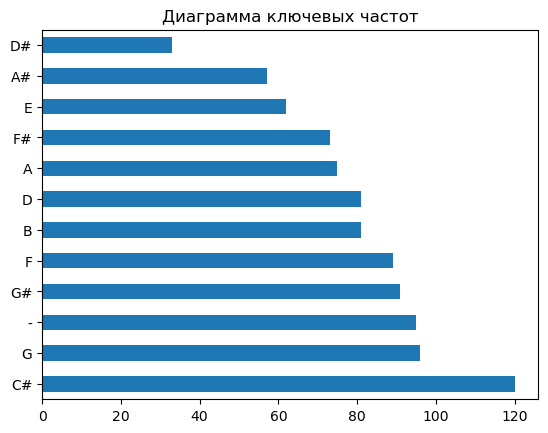

In [42]:
df['key'].value_counts().plot.barh().set_title('Диаграмма ключевых частот')

<Axes: xlabel='key', ylabel='streams'>

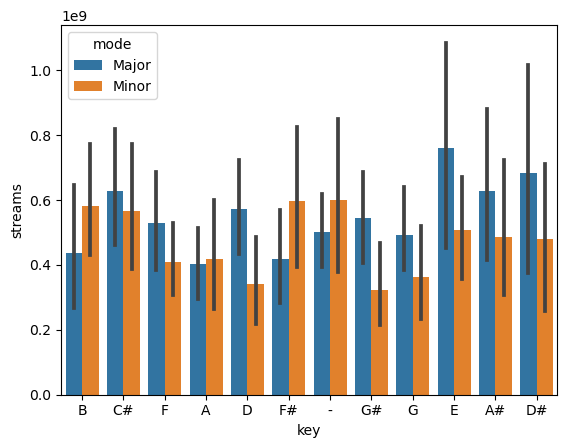

In [43]:
sns.barplot(x = 'key', y = 'streams', hue = 'mode', data = df)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    object 
 5   in_spotify_playlists  953 non-null    int64  
 6   in_spotify_charts     953 non-null    int64  
 7   streams               952 non-null    float64
 8   in_apple_playlists    953 non-null    int64  
 9   in_apple_charts       953 non-null    int64  
 10  in_deezer_playlists   953 non-null    object 
 11  in_deezer_charts      953 non-null    int64  
 12  in_shazam_charts      953 non-null    object 
 13  bpm                   953 non-null    int64  
 14  key                   953 non-null    object 
 15  mode                  9

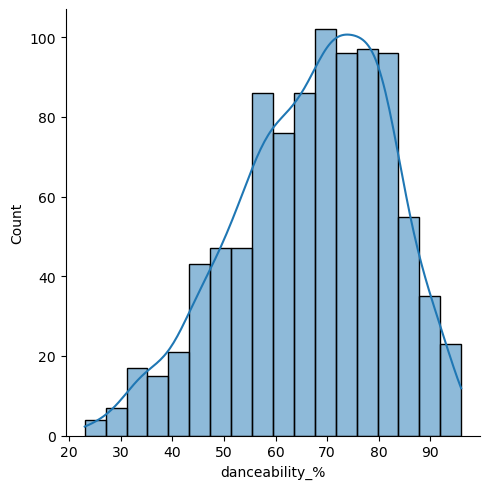

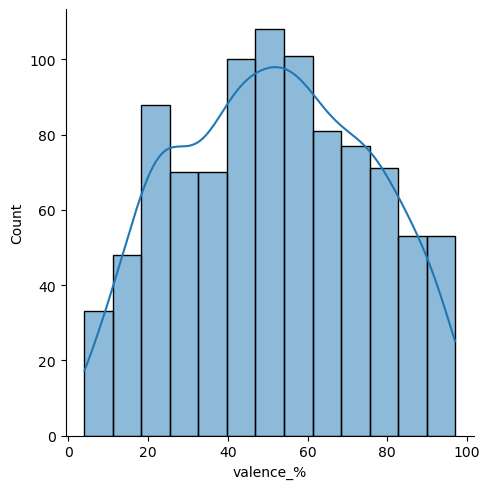

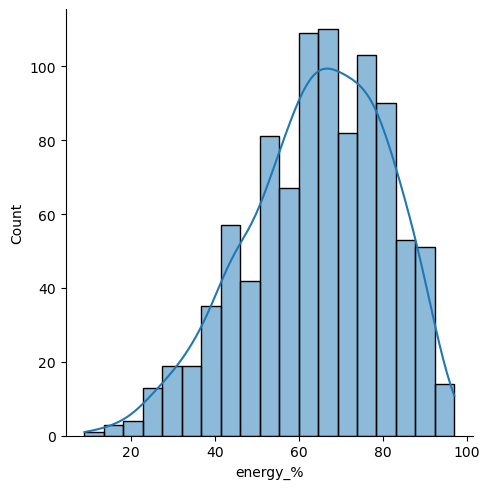

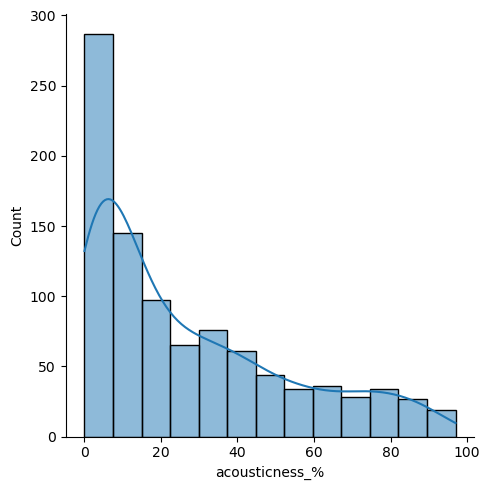

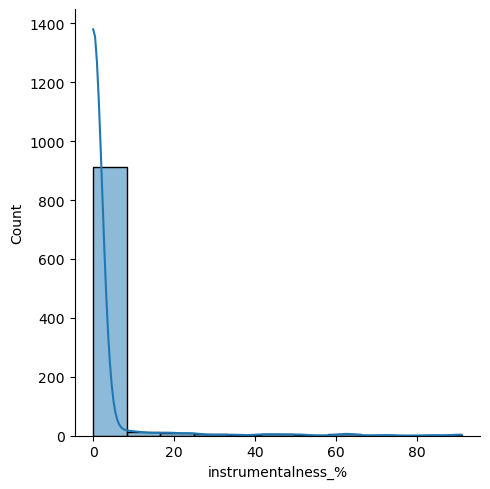

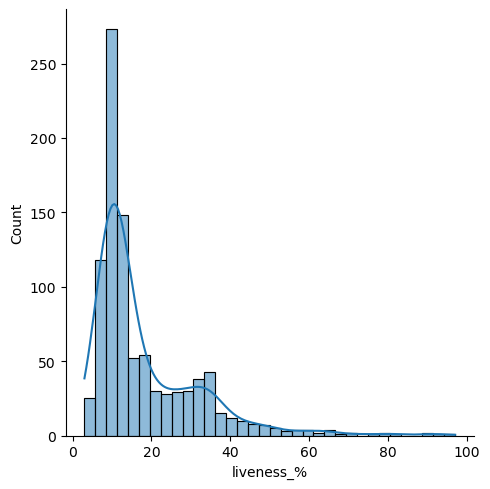

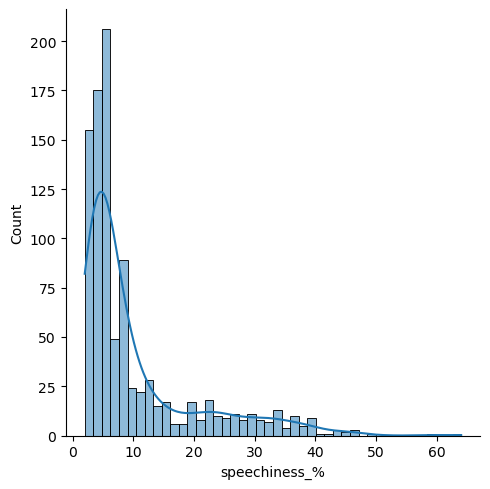

In [45]:
percentage_variables = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
([sns.displot(df[i], kde = True) for i in percentage_variables]);

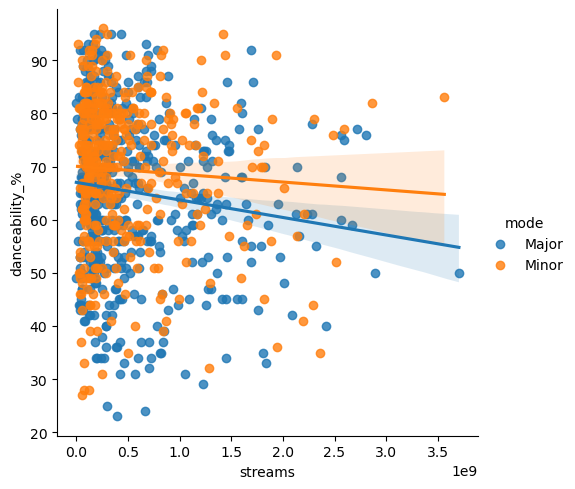

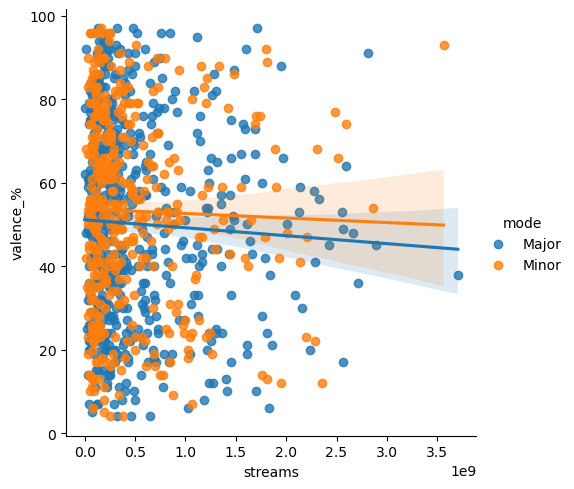

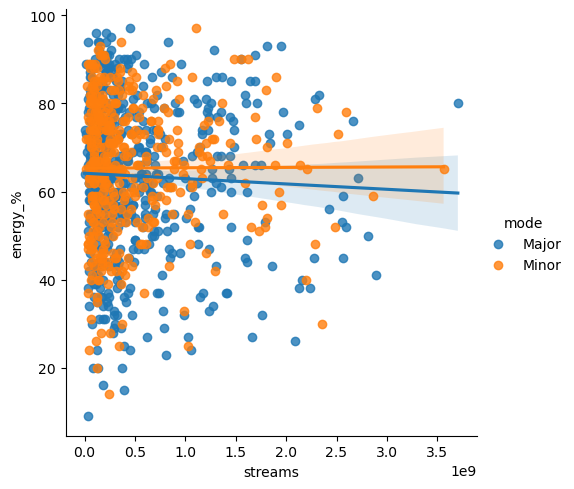

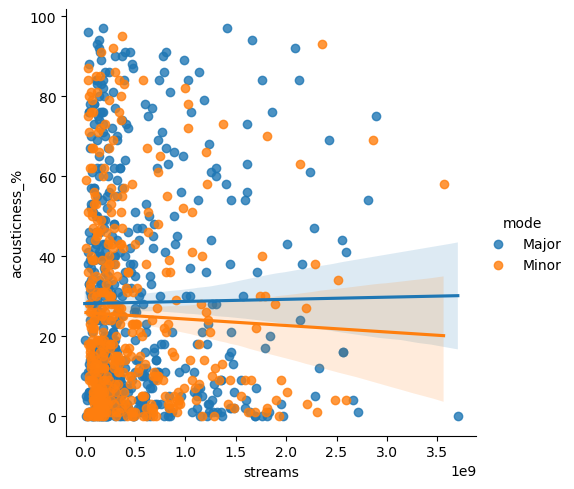

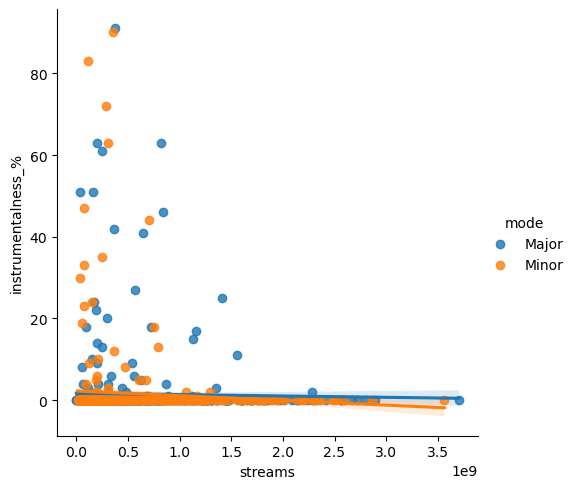

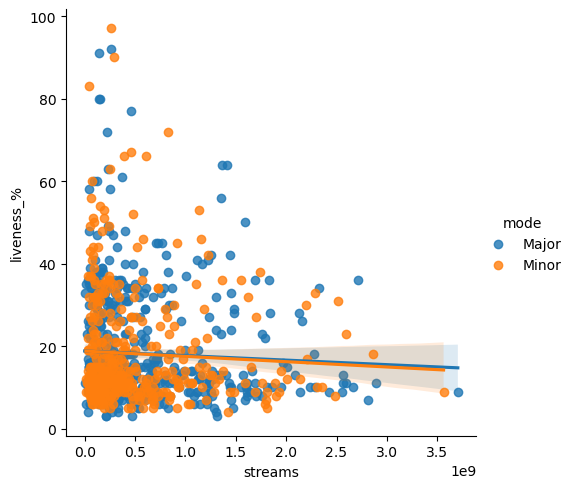

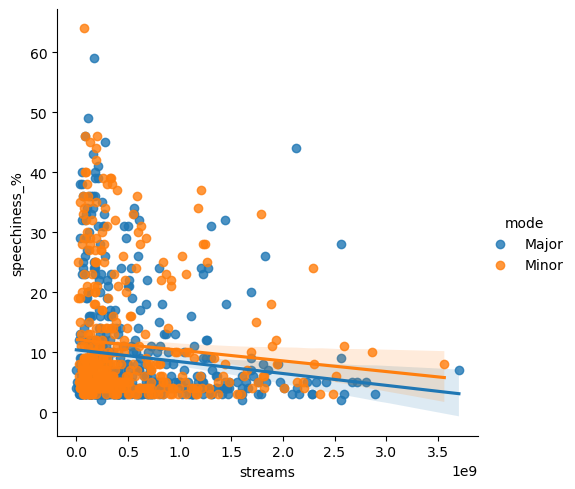

In [47]:
([sns.lmplot(x = 'streams', y = i, hue = 'mode', data = df) for i in percentage_variables]);

**Не наблюдается сущесвтвенной связи между "danceability", "valence", "energy", "acousticness", "instrumentalness", "liveness", "speechiness" and "streams" в разных режимах

In [48]:
percentage_variables.append('bpm')
numeric_variebles = percentage_variables
numeric_variebles

['danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%',
 'bpm']

Text(0.5, 1.0, 'Корреляция')

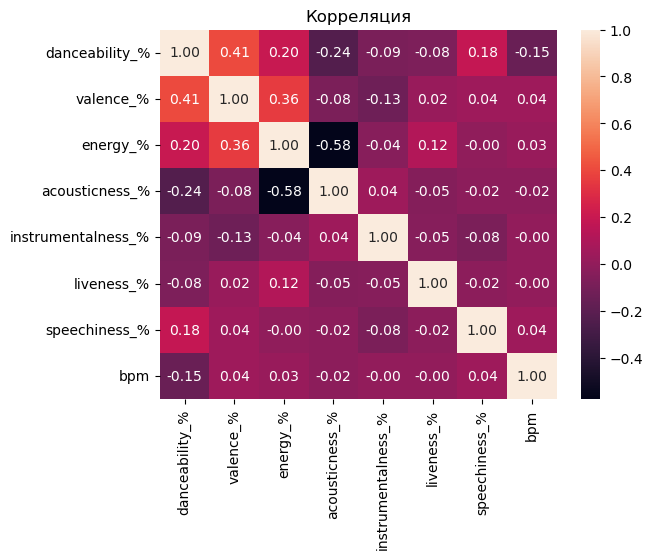

In [49]:
corr_matrix = df[numeric_variebles].corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')
plt.title('Корреляция')

**Имеется сильная обратная зависимость между acousticness и energy

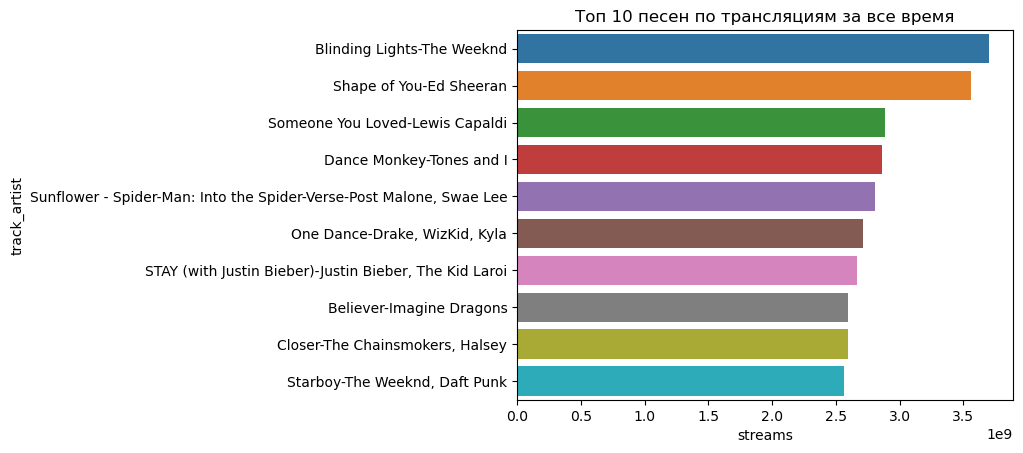

In [61]:
df['track_artist'] = df['track_name'] + '-' + df['artist(s)_name']
most_stream_songs = df.groupby('track_artist')['streams'].max().sort_values(ascending = False).head(10)

sns.barplot(x = most_stream_songs, y = most_stream_songs.index);
plt.title('Топ 10 песен по трансляциям за все время')
plt.show()

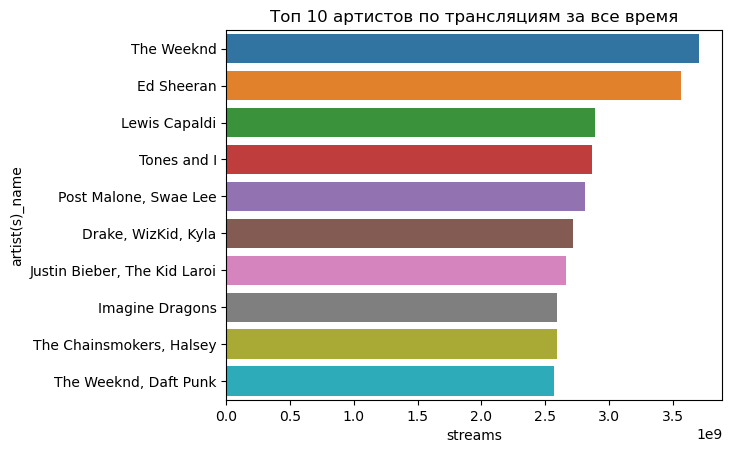

In [62]:
most_stream_artist = df.groupby('artist(s)_name')['streams'].max().sort_values(ascending = False).head(10)
sns.barplot(x = most_stream_artist, y = most_stream_artist.index);
plt.title('Топ 10 артистов по трансляциям за все время')
plt.show()

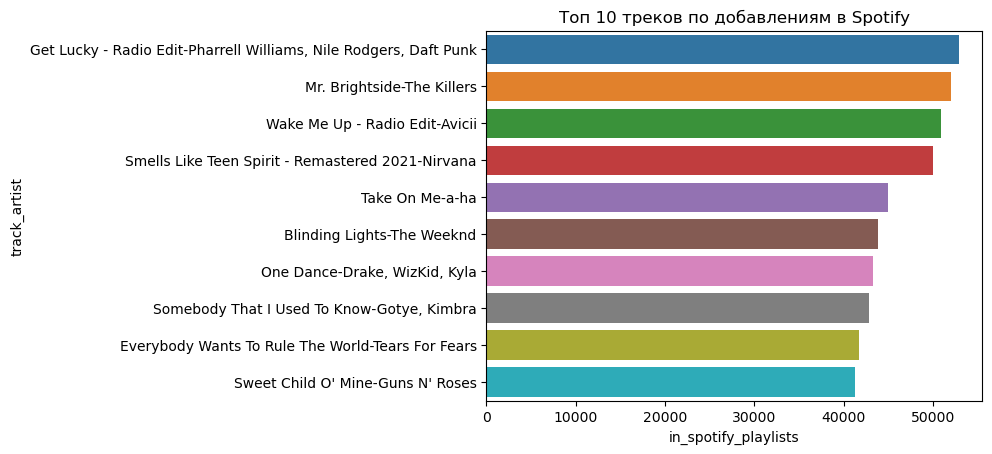

In [64]:
most_added_song_in_spotify = df.groupby('track_artist')['in_spotify_playlists'].max().sort_values(ascending = False).head(10)
sns.barplot(x = most_added_song_in_spotify, y = most_added_song_in_spotify.index);
plt.title('Топ 10 треков по добавлениям в Spotify')
plt.show()

<Axes: xlabel='streams', ylabel='released_month'>

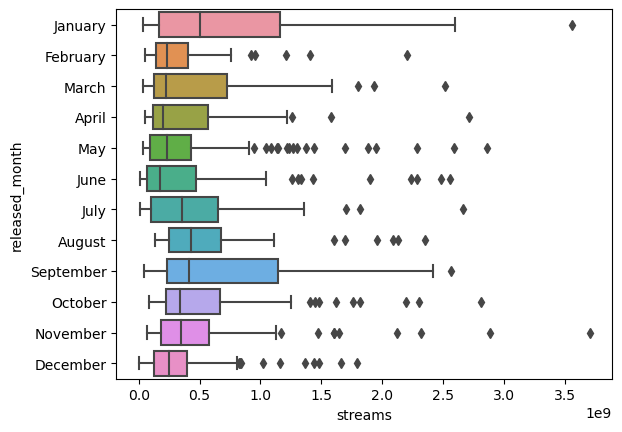

In [65]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                  'November', 'December']
sns.boxplot(x = 'streams',  y = 'released_month', data = df, order = months)

**Наивысшее среднее значение приходится на январь, самая же популярная песня выходит в ноябре

<Axes: xlabel='artist_count', ylabel='streams'>

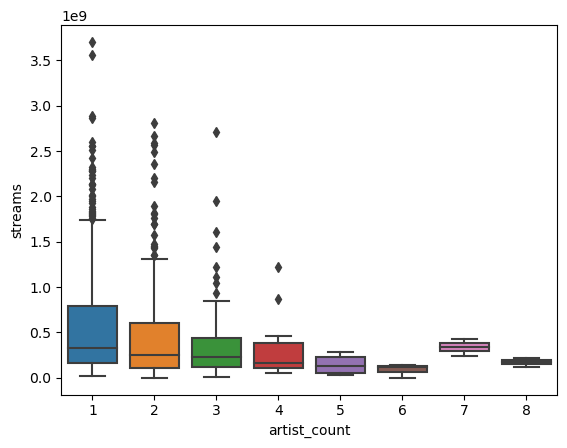

In [66]:
sns.boxplot(x = 'artist_count', y = 'streams', data = df)

**Если сравнивать все песни, независимо от количества артистов, то у треков с 7 исполнителями наивысшее среднее по трансляциям

In [67]:
seven_artists = df[(df.artist_count == 7)]
seven_artists

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_artist
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,November,2785,0,432719968.0,95,89,...,-,Minor,58,83,45,36,0,11,8,"We Don't Talk About Bruno-Adassa, Mauro Castil..."
667,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7,2022,January,1034,1,245400167.0,19,5,...,F,Minor,67,74,75,44,0,7,30,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab..."


**Видим, что одна из двух песен с 7 артистами выпущена в Ноябре, другая в Январе и мы выяснили, что именно в эти месяцы в целом больше всего трансляций

In [68]:
decade = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
last_decade = df[df['released_year'].isin(decade)]

In [69]:
songs_count = pd.pivot_table(last_decade, index = ['released_year'], values = ['track_artist'], aggfunc = 'count')
songs_count

,track_artist
released_year,
2014,13
2015,11
2016,18
2017,23
2018,10
2019,36
2020,37
2021,119
2022,402


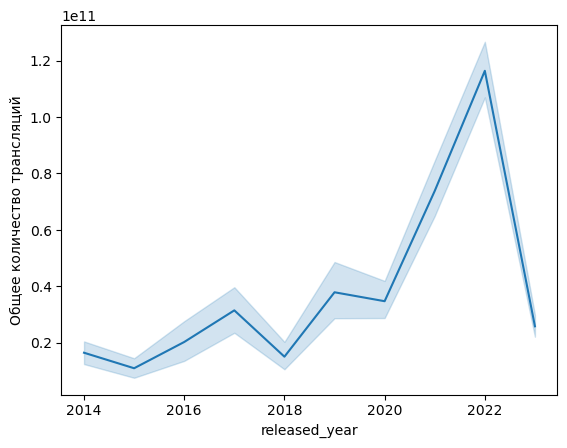

In [72]:
sns.lineplot(x = 'released_year', y = 'streams', data = last_decade, estimator = 'sum');
plt.ylabel('Общее количество трансляций')
plt.show()

# Лучшие песни за каждый год

### 2023

In [74]:
year_2023 = df[(df['released_year'] == 2023)]
best_2023 = year_2023.sort_values(by = 'streams', ascending = False).head(10)

In [75]:
year_2023.released_month.unique()

array(['July', 'March', 'June', 'May', 'April', 'January', 'February'],
      dtype=object)

2023 год рассчитан до Июля

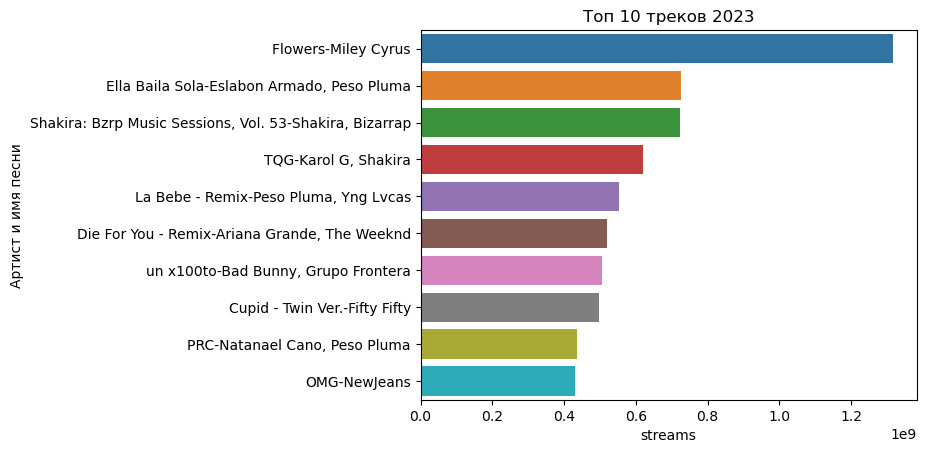

In [76]:
sns.barplot(x = 'streams', y = 'track_artist', data = best_2023)
plt.title('Топ 10 треков 2023')
plt.ylabel('Артист и имя песни')
plt.show()

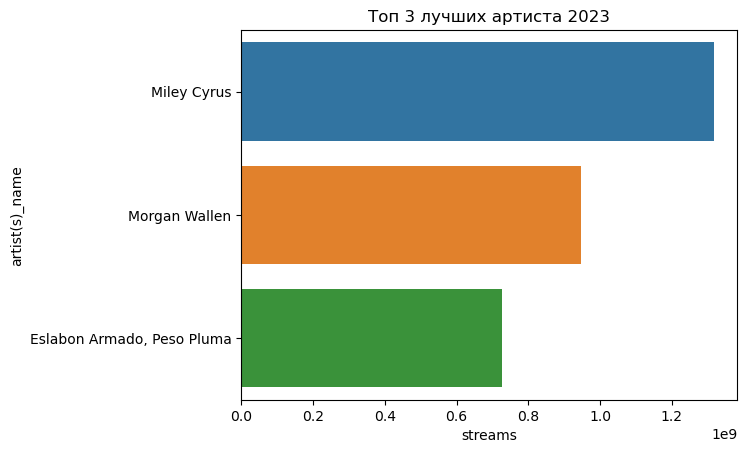

In [78]:
best_artist_2023 = year_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2023, y = best_artist_2023.index);
plt.title('Топ 3 лучших артиста 2023')
plt.show()

### 2022

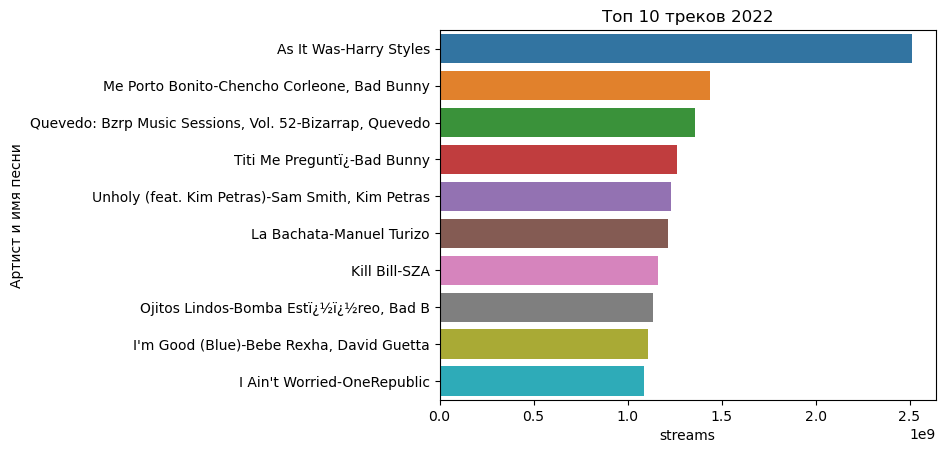

In [79]:
year_2022 = df[(df['released_year'] == 2022)]
best_2022 = year_2022.sort_values(by = 'streams', ascending = False).head(10)
sns.barplot(x = 'streams', y = 'track_artist', data = best_2022)
plt.title('Топ 10 треков 2022')
plt.ylabel('Артист и имя песни')
plt.show()

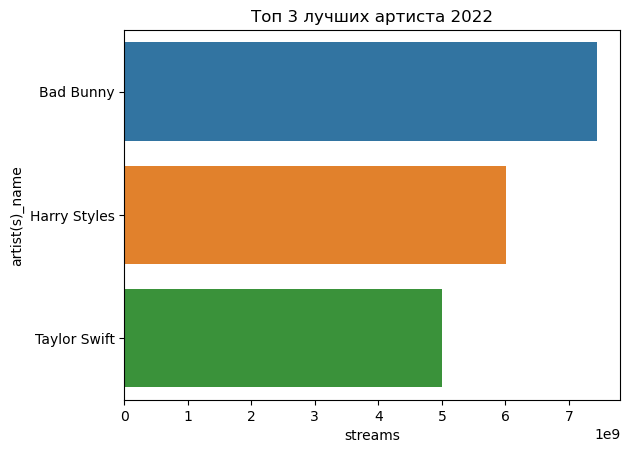

In [81]:
best_artist_2022 = year_2022.groupby('artist(s)_name')['streams'].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2022, y = best_artist_2022.index);
plt.title('Топ 3 лучших артиста 2022')
plt.show()

### 2021

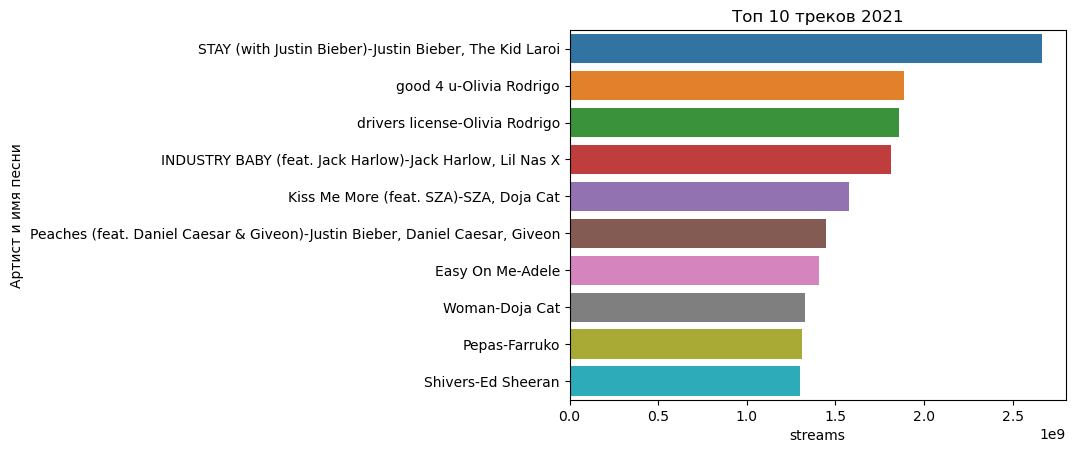

In [82]:
year_2021 = df[(df['released_year'] == 2021)]
best_2021 = year_2021.sort_values(by = 'streams', ascending = False).head(10)
sns.barplot(x = 'streams', y = 'track_artist', data = best_2021)
plt.title('Топ 10 треков 2021')
plt.ylabel('Артист и имя песни')
plt.show()

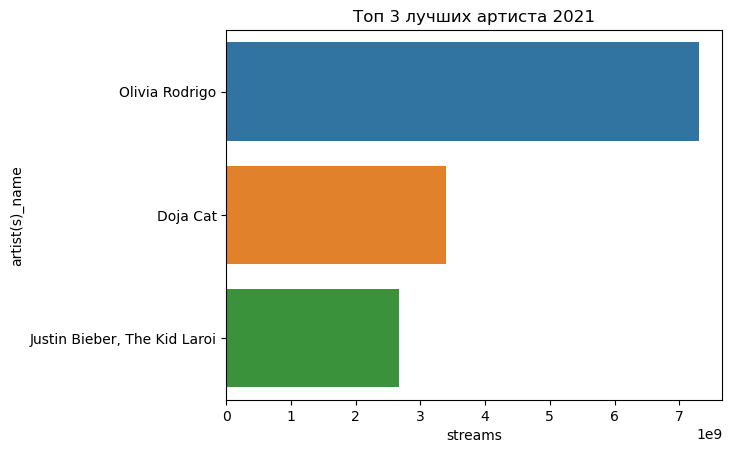

In [83]:
best_artist_2021 = year_2021.groupby('artist(s)_name')['streams'].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2021, y = best_artist_2021.index);
plt.title('Топ 3 лучших артиста 2021')
plt.show()

### 2020

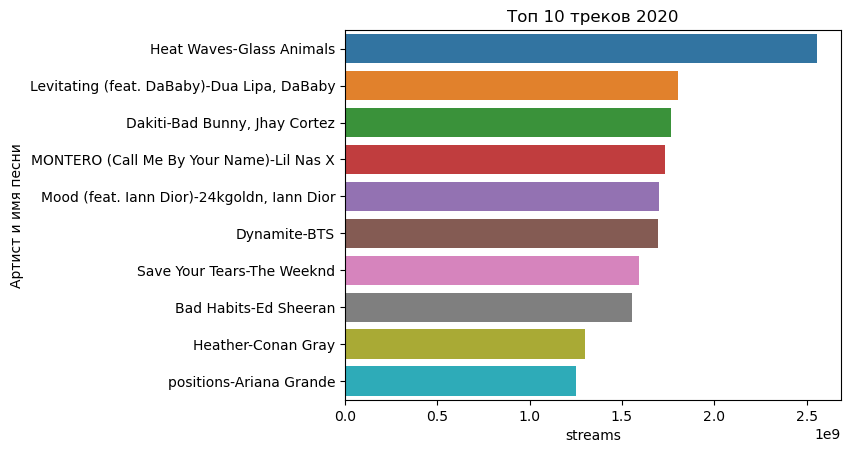

In [84]:
year_2020 = df[(df['released_year'] == 2020)]
best_2020 = year_2020.sort_values(by = 'streams', ascending = False).head(10)
sns.barplot(x = 'streams', y = 'track_artist', data = best_2020)
plt.title('Топ 10 треков 2020')
plt.ylabel('Артист и имя песни')
plt.show()

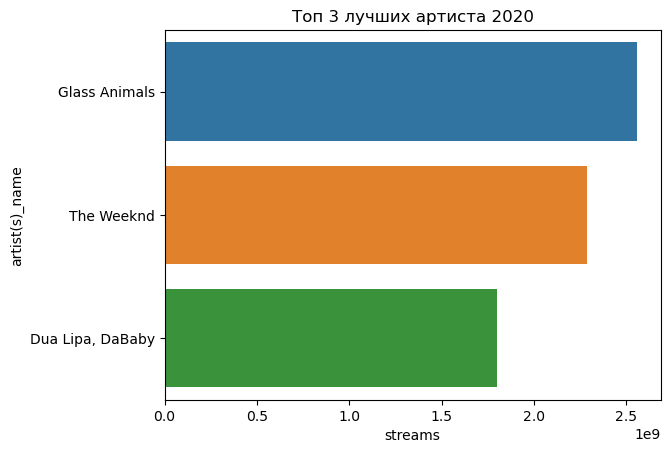

In [85]:
best_artist_2020 = year_2020.groupby('artist(s)_name')['streams'].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2020, y = best_artist_2020.index);
plt.title('Топ 3 лучших артиста 2020')
plt.show()

### 2019

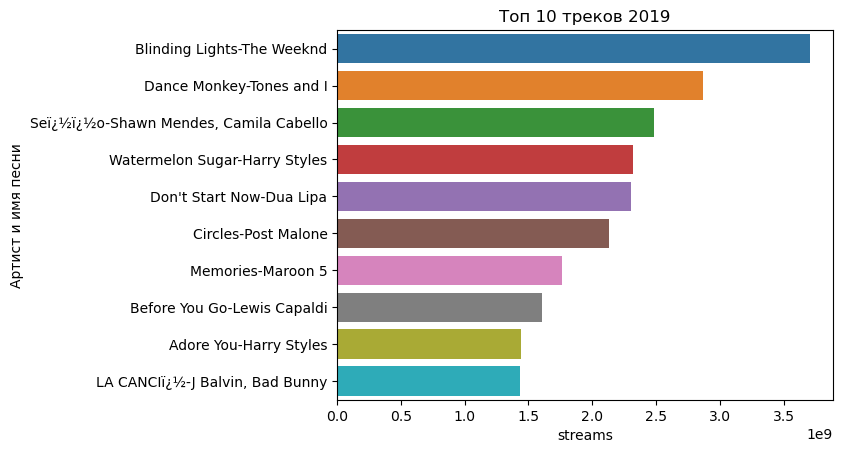

In [86]:
year_2019 = df[(df['released_year'] == 2019)]
best_2019 = year_2019.sort_values(by = 'streams', ascending = False).head(10)
sns.barplot(x = 'streams', y = 'track_artist', data = best_2019)
plt.title('Топ 10 треков 2019')
plt.ylabel('Артист и имя песни')
plt.show()

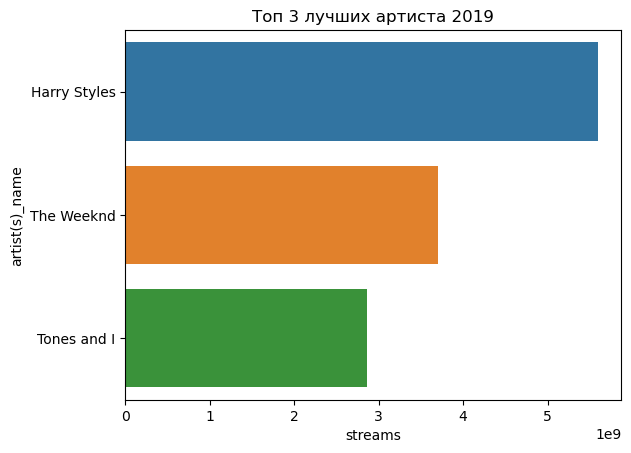

In [87]:
best_artist_2019 = year_2019.groupby('artist(s)_name')['streams'].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2019, y = best_artist_2019.index);
plt.title('Топ 3 лучших артиста 2019')
plt.show()